In [129]:
# 고객 이탈에 여부 분류 모델
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
# 데이터 읽기
import pandas as pd
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1. 데이터 기본 정보 확인

In [130]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
df.select_dtypes(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [132]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [134]:
# Churn Yes No --> 1 0 으로 변경
df['Churn'] =  df.Churn.map({'Yes':1,'No':0})
# df.Churn.apply(lambda x : 1 if x=='Yes' else 0)

In [135]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### baseline 데이터 및 모델 생성

In [136]:
# 피처선택 
base_df =  df.select_dtypes(include=['int','float']).copy()
# 결측치 처리
base_df = base_df.dropna()
X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn
# 클래스 불균형
print( y.value_counts() )
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# rus = RandomUnderSampler(random_state=42)
# X,y = rus.fit_resample(X,y)

smote = SMOTE()
X,y = smote.fit_resample(X,y)

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled =  scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# 모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# 학습
knn.fit(x_train_scaled, y_train)
# 평가
from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test, predict))

Churn
0    5163
1    1869
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1033
           1       0.75      0.79      0.77      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



#### 2. 주요 특성 시각화

In [137]:
# 고객 이탈에 여부 분류 모델
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
# 데이터 읽기
import pandas as pd
df = pd.read_csv(url)
df = df.drop(columns=['customerID'])
df.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


#### 데이터 누수 Data Leakage

학습데이터에 정답데이터(컬럼) 포함

In [138]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df = new_df.dropna()

X = new_df.drop(columns=['Churn'])
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})
y = new_df.Churn.to_numpy()

new_df['Partner']=new_df.Partner.map({'Yes':1, 'No':0})
new_df['Dependents']=new_df.Dependents.map({'Yes':1, 'No':0})
new_df['PhoneService']=new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)],axis=1)

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService'])
new_df.head()

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.to_numpy()
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [139]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df['TotalCharges'] =  pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df = new_df.dropna()
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})
new_df['Partner']=new_df.Partner.map({'Yes':1, 'No':0})
new_df['Dependents']=new_df.Dependents.map({'Yes':1, 'No':0})
new_df['PhoneService']=new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)],axis=1)

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService'])

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.drop(columns=['Churn']).to_numpy()
y = train_df.Churn.to_numpy()

# 클래스 불균형 해결
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1033
           1       0.79      0.77      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



#### 새로운 피처 탐색

In [140]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df = df.dropna()

In [142]:
df.select_dtypes(exclude=['object']).corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [144]:
import seaborn as sns
# 성별에 따른 이탈률
# sns.countplot(data=df,x='PhoneService',hue='Churn')
# 차이를 보이는 Partner	Dependents	PhoneService 컬럼을 onehot으로 변경해서 학습에 적용
new_df =  df.copy()
new_df['TotalCharges'] =  pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df = new_df.dropna()
new_df['Churn'] = new_df.Churn.map({'Yes':1,'No':0})
# new_df['Partner']=new_df.Partner.map({'Yes':1, 'No':0})
# new_df['Dependents']=new_df.Dependents.map({'Yes':1, 'No':0})
# new_df['PhoneService']=new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)],axis=1)

new_df = new_df.drop(columns=['Partner','Dependents','PhoneService','TotalCharges'])

# 학습가능한 수치데이터
train_df = new_df.select_dtypes(include=['int','float'])
X = train_df.drop(columns=['Churn']).to_numpy()
y = train_df.Churn.to_numpy()

# 클래스 불균형 해결
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
# 정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train);  x_test_scaled = s.fit_transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1033
           1       0.80      0.76      0.78      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [149]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='tenure', ylabel='Count'>

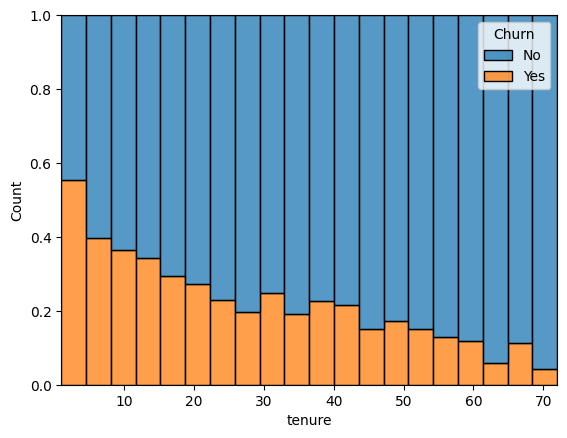

In [148]:
# tenure 에 따른 이탈률
sns.histplot(data=df, x='tenure', hue='Churn',multiple='fill',bins=20)

<Axes: xlabel='Contract', ylabel='Count'>

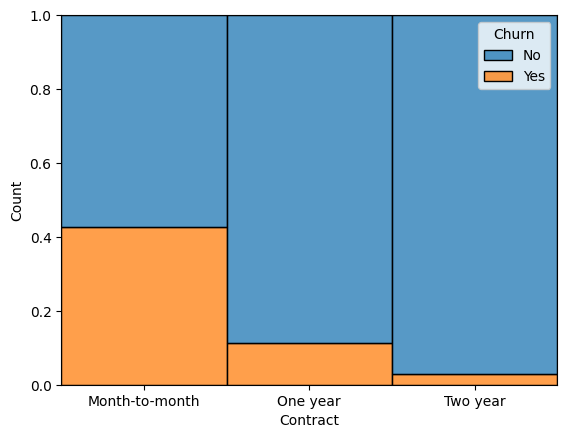

In [150]:
# Contract 에 따른 이탈률
sns.histplot(data=df, x='Contract', hue='Churn',multiple='fill',bins=20)

In [ ]:
# baseline에서 상관관계로 Total... 변수 제거한 모델에  + tenure , Contract 를 범주형 데이털 변환하고 onehot으로 변경
